# COVID-19 - Italy - Population

## Initial setup

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
# Repo: https://github.com/CSSEGISandData/COVID-19
url_repo = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

url_covid_confirmed = url_repo + 'time_series_covid19_confirmed_global.csv'
url_covid_deaths = url_repo + 'time_series_covid19_deaths_global.csv'
url_covid_recovered = url_repo + 'time_series_covid19_recovered_global.csv'


c19_conf = pd.read_csv(url_covid_confirmed)

# drop irrelevant columns
#pop.drop(columns=['Country Name', 'Year Code'], axis=1, inplace=True)


## Data Preparation / Pre-processing - (Patient)

In [132]:
c19_conf = c19_conf.rename(columns={'Country/Region': 'Country', 'Province/State': 'State'})

# selected countries
c2i = ["Italy", "Germany", "France", "Denmark", "Hungary"]

c19_conf_sel = c19_conf.loc[c19_conf['Country'].isin(c2i) & c19_conf['State'].isna()]

c19_conf_sel = c19_conf_sel.drop(columns=['State', 'Lat', 'Long'], axis=1, inplace=False)

c19_conf_sel.set_index("Country", inplace=True)

c19_conf_sel.head()
#patient.loc[:, patient.columns.isin(['sex','birth_year','age','age_group'])]


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,0,0,0,0,0,0,0,0,0,0,...,7242,7384,7515,7695,7912,8073,8210,8445,8575,8698
France,0,0,2,3,3,3,4,5,5,5,...,146906,151808,154188,156921,154715,157026,158636,160292,160847,164589
Germany,0,0,0,0,0,1,4,4,4,5,...,143342,145184,147065,148291,150648,153129,154999,156513,157770,158758
Hungary,0,0,0,0,0,0,0,0,0,0,...,1834,1916,1984,2098,2168,2284,2443,2443,2500,2583
Italy,0,0,0,0,0,0,0,0,0,2,...,175925,178972,181228,183957,187327,189973,192994,195351,197675,199414


In [144]:
# Transpose 
c19_conf_sel_trans = c19_conf_sel.transpose()
c19_conf_sel_trans['Date'] =  pd.to_datetime(c19_conf_sel_trans.index)
c19_conf_sel_trans = c19_conf_sel_trans.set_index("Date", drop = True)
c19_conf_sel_trans



Country,Denmark,France,Germany,Hungary,Italy
Date,,,,,
2020-01-22,0,0,0,0,0
2020-01-23,0,0,0,0,0
2020-01-24,0,2,0,0,0
2020-01-25,0,3,0,0,0
2020-01-26,0,3,0,0,0
...,...,...,...,...,...
2020-04-23,8073,157026,153129,2284,189973
2020-04-24,8210,158636,154999,2443,192994
2020-04-25,8445,160292,156513,2443,195351


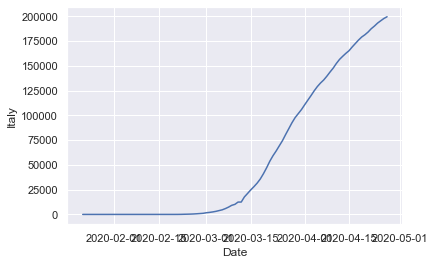

In [157]:
# Number of confirmed cases
sns.lineplot(x=c19_conf_sel_trans.index, y="Italy", data=c19_conf_sel_trans)
